## Jon intro to python, lesson 5 (10/1/17)

### in lesson four, we covered a more in-depth intro to plotting and downloading new modules; here we explore using the datetime datatype and linear regression in python

---

### Datetime: super helpful python datatype that makes organizing and breaking down timeseries data really simple and straightforward (pandas timeseries documentation: http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

### let's look at creating datetime format:

In [1]:
import pandas as pd
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime # need datetime for doing datetime things

In [2]:
data = {'date': ['2014-05-01 18:47:05.069722', 
                 '2014-05-01 18:47:05.119994', 
                 '2014-05-02 18:47:05.178768', 
                 '2014-05-02 18:47:05.230071', 
                 '2014-05-02 18:47:05.230071', 
                 '2014-05-02 18:47:05.280592', 
                 '2014-05-03 18:47:05.332662', 
                 '2014-05-03 18:47:05.385109', 
                 '2014-05-04 18:47:05.436523', 
                 '2014-05-04 18:47:05.486877',
                 '2015-06-01 18:47:05.069722', 
                 '2015-06-01 18:47:05.119994', 
                 '2015-06-02 18:47:05.178768', 
                 '2015-06-02 18:47:05.230071', 
                 '2015-06-02 18:47:05.230071', 
                 '2015-06-02 18:47:05.280592', 
                 '2015-06-03 18:47:05.332662', 
                 '2015-06-03 18:47:05.385109', 
                 '2015-06-04 18:47:05.436523', 
                 '2015-06-04 18:47:05.486877'], 
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41, 24, 45, 32, 14, 25, 34, 65, 34, 27, 44]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
print(df)

                          date  battle_deaths
0   2014-05-01 18:47:05.069722             34
1   2014-05-01 18:47:05.119994             25
2   2014-05-02 18:47:05.178768             26
3   2014-05-02 18:47:05.230071             15
4   2014-05-02 18:47:05.230071             15
5   2014-05-02 18:47:05.280592             14
6   2014-05-03 18:47:05.332662             26
7   2014-05-03 18:47:05.385109             25
8   2014-05-04 18:47:05.436523             62
9   2014-05-04 18:47:05.486877             41
10  2015-06-01 18:47:05.069722             24
11  2015-06-01 18:47:05.119994             45
12  2015-06-02 18:47:05.178768             32
13  2015-06-02 18:47:05.230071             14
14  2015-06-02 18:47:05.230071             25
15  2015-06-02 18:47:05.280592             34
16  2015-06-03 18:47:05.332662             65
17  2015-06-03 18:47:05.385109             34
18  2015-06-04 18:47:05.436523             27
19  2015-06-04 18:47:05.486877             44


### converting from normal string to datetime:

In [5]:
# is our date column datetime?
isinstance(df.date[1],datetime)

False

In [11]:
#convert the date column to datetime:

df['date'] = pd.to_datetime(df['date'])

# set the new datetime column to the index, delete the old column:

df.index = df['date']
del df['date']
df

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


### let's look at breaking the data down using dates:

In [12]:
# view all data in 2014:
df['2014']

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [13]:
# count number of deaths in 2014:
print('number of deaths in 2014:',df['2014']['battle_deaths'].sum())

number of deaths in 2014: 283


In [14]:
# let's see all data in June of 2015:
df['2015-06']

,battle_deaths
date,
2015-06-01 18:47:05.069722,24
2015-06-01 18:47:05.119994,45
2015-06-02 18:47:05.178768,32
2015-06-02 18:47:05.230071,14
2015-06-02 18:47:05.230071,25
2015-06-02 18:47:05.280592,34
2015-06-03 18:47:05.332662,65
2015-06-03 18:47:05.385109,34
2015-06-04 18:47:05.436523,27


In [16]:
# all data on June 3rd of 2015:
df['2015-06-03']['battle_deaths'].mean()

49.5

In [17]:
# all data that occurs after a certain date:
df[datetime(2014, 5, 3):]

,battle_deaths
date,
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41
2015-06-01 18:47:05.069722,24
2015-06-01 18:47:05.119994,45
2015-06-02 18:47:05.178768,32
2015-06-02 18:47:05.230071,14
2015-06-02 18:47:05.230071,25


In [18]:
# data between two dates:

df['6/3/2015':'6/4/2015']

,battle_deaths
date,
2015-06-03 18:47:05.332662,65
2015-06-03 18:47:05.385109,34
2015-06-04 18:47:05.436523,27
2015-06-04 18:47:05.486877,44


In [19]:
# mean deaths per day:
df.resample('D').mean()

,battle_deaths
date,
2014-05-01,29.50
2014-05-02,17.50
2014-05-03,25.50
2014-05-04,51.50
2014-05-05,NaN
2014-05-06,NaN
2014-05-07,NaN
2014-05-08,NaN
2014-05-09,NaN


In [20]:
# mean deaths per month:
df.resample('M').mean()

,battle_deaths
date,
2014-05-31,28.3
2014-06-30,NaN
2014-07-31,NaN
2014-08-31,NaN
2014-09-30,NaN
2014-10-31,NaN
2014-11-30,NaN
2014-12-31,NaN
2015-01-31,NaN


In [21]:
# mean deaths per year:
df.resample('A').mean()

,battle_deaths
date,
2014-12-31,28.3
2015-12-31,34.4


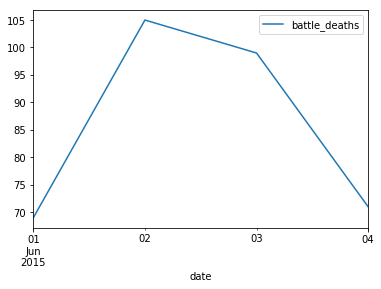

In [22]:
# plot the sum by day for June 2015:
df['2015-06'].resample('D').sum().plot()

### let's look at the stock data w/ datetime:

In [23]:
from pandas_datareader import data
# get apple stock prices over the past year, starting 1/1/17:
start = datetime(2017,1,1)
end = datetime.today()

stock = "AAPL"
source = 'yahoo' # can also use google finance ('google')
    
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = data.DataReader(stock, source, start, end)

# NB: might have to assign the date colum to datetime and set as the index when loading in the data

In [24]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,114.722694,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,114.594292,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,115.177040,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,116.461075,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,117.527794,33387600


In [25]:
# get data for certain dates:
apple['2017-07']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-03,144.880005,145.300003,143.100006,143.500000,142.938690,14277800
2017-07-05,143.690002,144.789993,142.720001,144.089996,143.526367,21569600
2017-07-06,143.020004,143.500000,142.410004,142.729996,142.171692,23510000
2017-07-07,142.899994,144.750000,142.899994,144.179993,143.616013,19201700
2017-07-10,144.110001,145.949997,143.369995,145.059998,144.492584,21090600
2017-07-11,144.729996,145.850006,144.380005,145.529999,144.960739,19781800
2017-07-12,145.869995,146.179993,144.820007,145.740005,145.169922,24884500
2017-07-13,145.500000,148.490005,145.440002,147.770004,147.191986,25199400
2017-07-14,147.970001,149.330002,147.330002,149.039993,148.457001,20132100


In [26]:
# mean Closing price for specific month:
apple['2017-07']['Close'].mean()

148.29949950000002

In [27]:
# means by month:
apple.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,119.093499,119.881000,118.785500,119.570000,118.100667,2.810378e+07
2017-02-28,133.234738,134.161579,132.836841,133.714209,132.467822,3.021618e+07
2017-03-31,140.362174,141.197826,139.709130,140.617826,139.492016,2.441863e+07
2017-04-30,143.030001,143.597895,142.327368,142.886842,141.742866,1.964758e+07
2017-05-31,151.965908,153.061363,151.108637,152.227726,151.409508,2.971615e+07
2017-06-30,148.215001,149.088636,146.582727,147.831362,147.253103,3.109900e+07
2017-07-31,148.096500,149.176500,147.105502,148.299500,147.719408,2.106966e+07
2017-08-31,158.946958,160.151740,157.803479,159.021306,158.834381,2.873802e+07
2017-09-30,158.109000,158.869501,156.446500,157.608500,157.608500,3.401634e+07


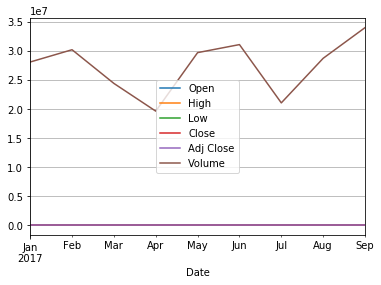

In [28]:
# plot means by month:
apple.resample('M').mean().plot(grid=True)

***
### linear regression w/ python:

#### Let's load an advertising dataset and explore linear regression:

In [29]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
print('number of observations:',len(data))
col_names = list(data.columns)
print('features:', col_names)

number of observations: 200
features: ['TV', 'radio', 'newspaper', 'sales']


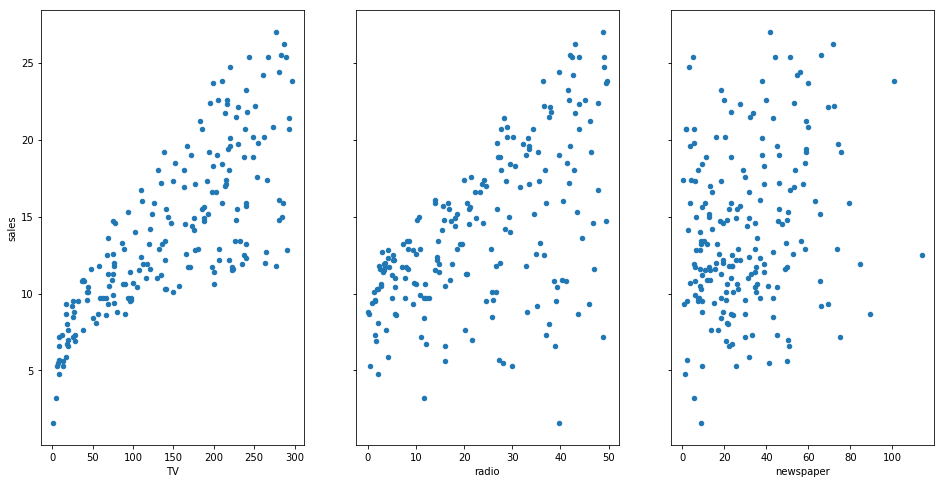

In [31]:
# visualize the relationship between some of the features and sales w/ scatterplots:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [32]:
# let's look at sales by TV:

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [33]:
# let's use the model we created to make a prediction:

X_new = pd.DataFrame({'TV': [40]})
X_new.head()

,TV
0,40


In [34]:
# use the model to make predictions on a new value
print('if we spend 50k on TV ads, we predict to sell:', round(lm.predict(X_new)[0],2), ' thousand units')

if we spend 50k on TV ads, we predict to sell: 8.93  thousand units


### manually plot regression line:

In [35]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [36]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

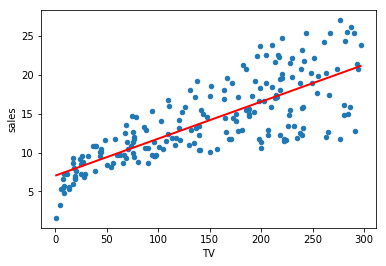

In [37]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

### or, using our good friend seaborn:

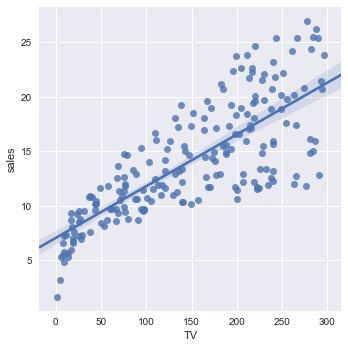

In [38]:
import seaborn as sns
sns.lmplot(x='TV',y='sales',data=data,fit_reg=True)

In [39]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [40]:
# print the R-squared value for the model

# R-squared: proportion of variance explained, meaning the proportion of variance in the 
# observed data that is explained by the model

lm.rsquared

0.61187505085007099

### Let's add more features and do some multiple linear regression:

In [41]:
# create a fitted model with three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [42]:
# instead of going through output piecemeal, let's look at a summary:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 01 Oct 2017   Prob (F-statistic):           1.58e-96
Time:                        14:57:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### let's take a look at interaction terms:

In [ ]:
# create a fitted model with three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper + TV*radio', data=data).fit()

# print the coefficients
lm.params

In [ ]:
lm.summary()